In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#1.load data
data=load_breast_cancer()
x=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target)
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [23]:
# 2. Exploratory Data Analysis (EDA)
print("Dataset Shape:", x.shape)
print("\nTarget Distribution:")
print(y.value_counts(normalize=True))

Dataset Shape: (569, 30)

Target Distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [31]:
#2.Overall Information
print(x.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

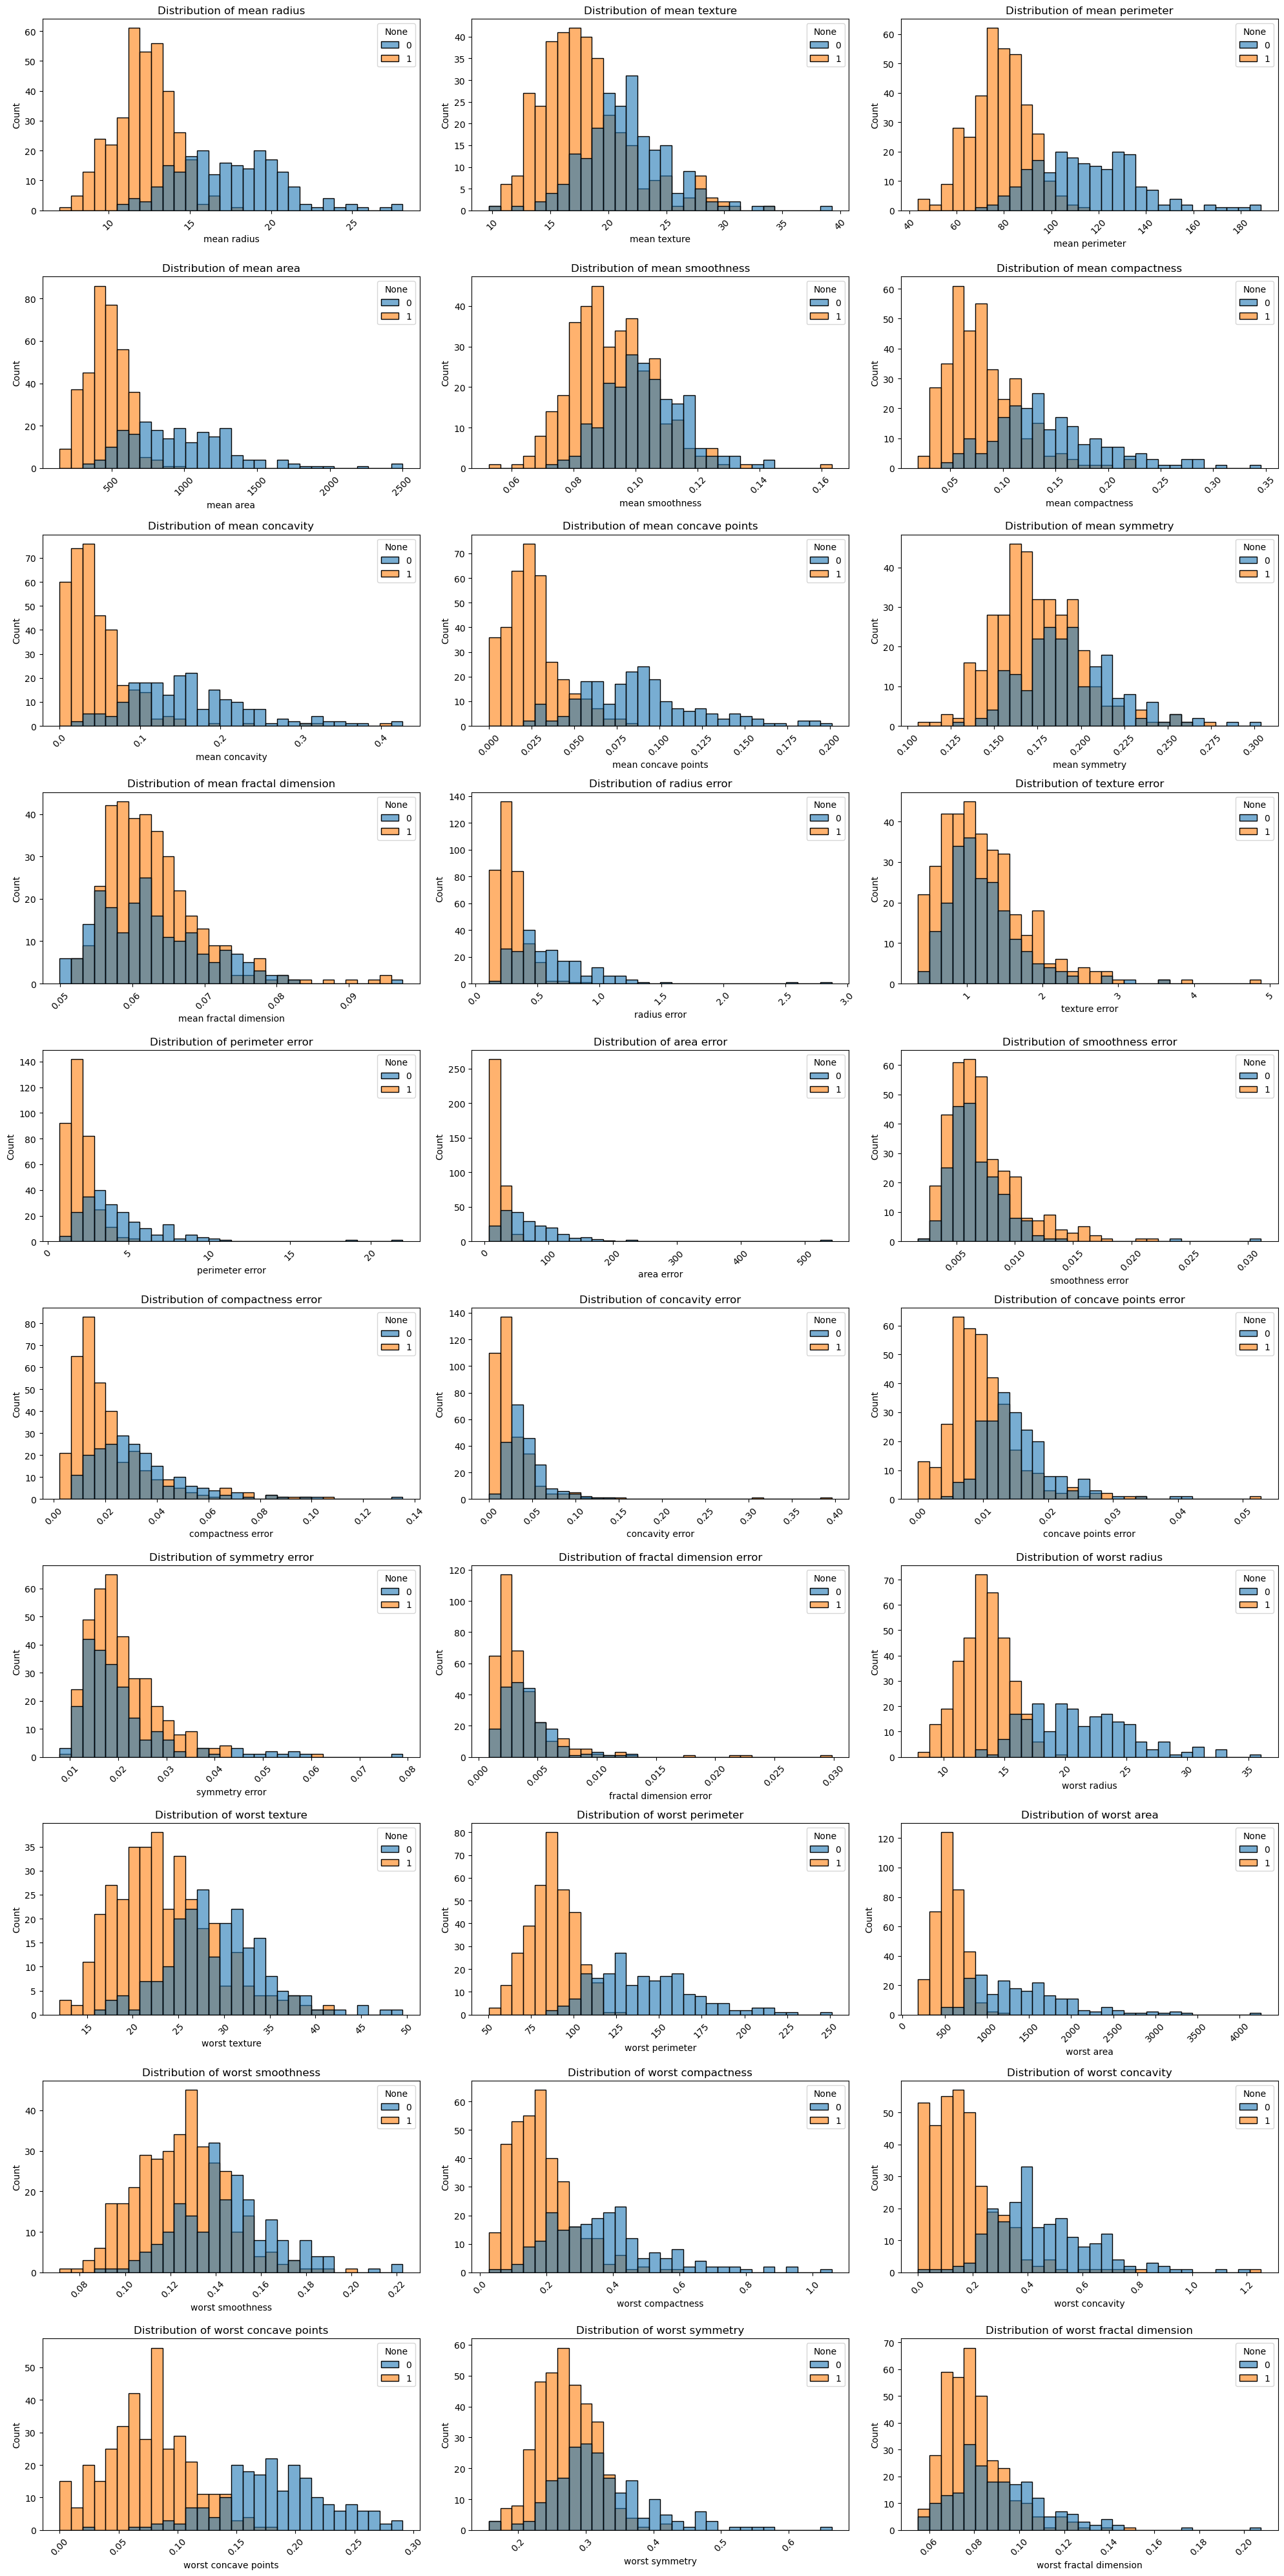

In [35]:
# 3  Histogram for all features
plt.figure(figsize=(20, 40))
for i, column in enumerate(x.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=x, x=column, hue=y, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

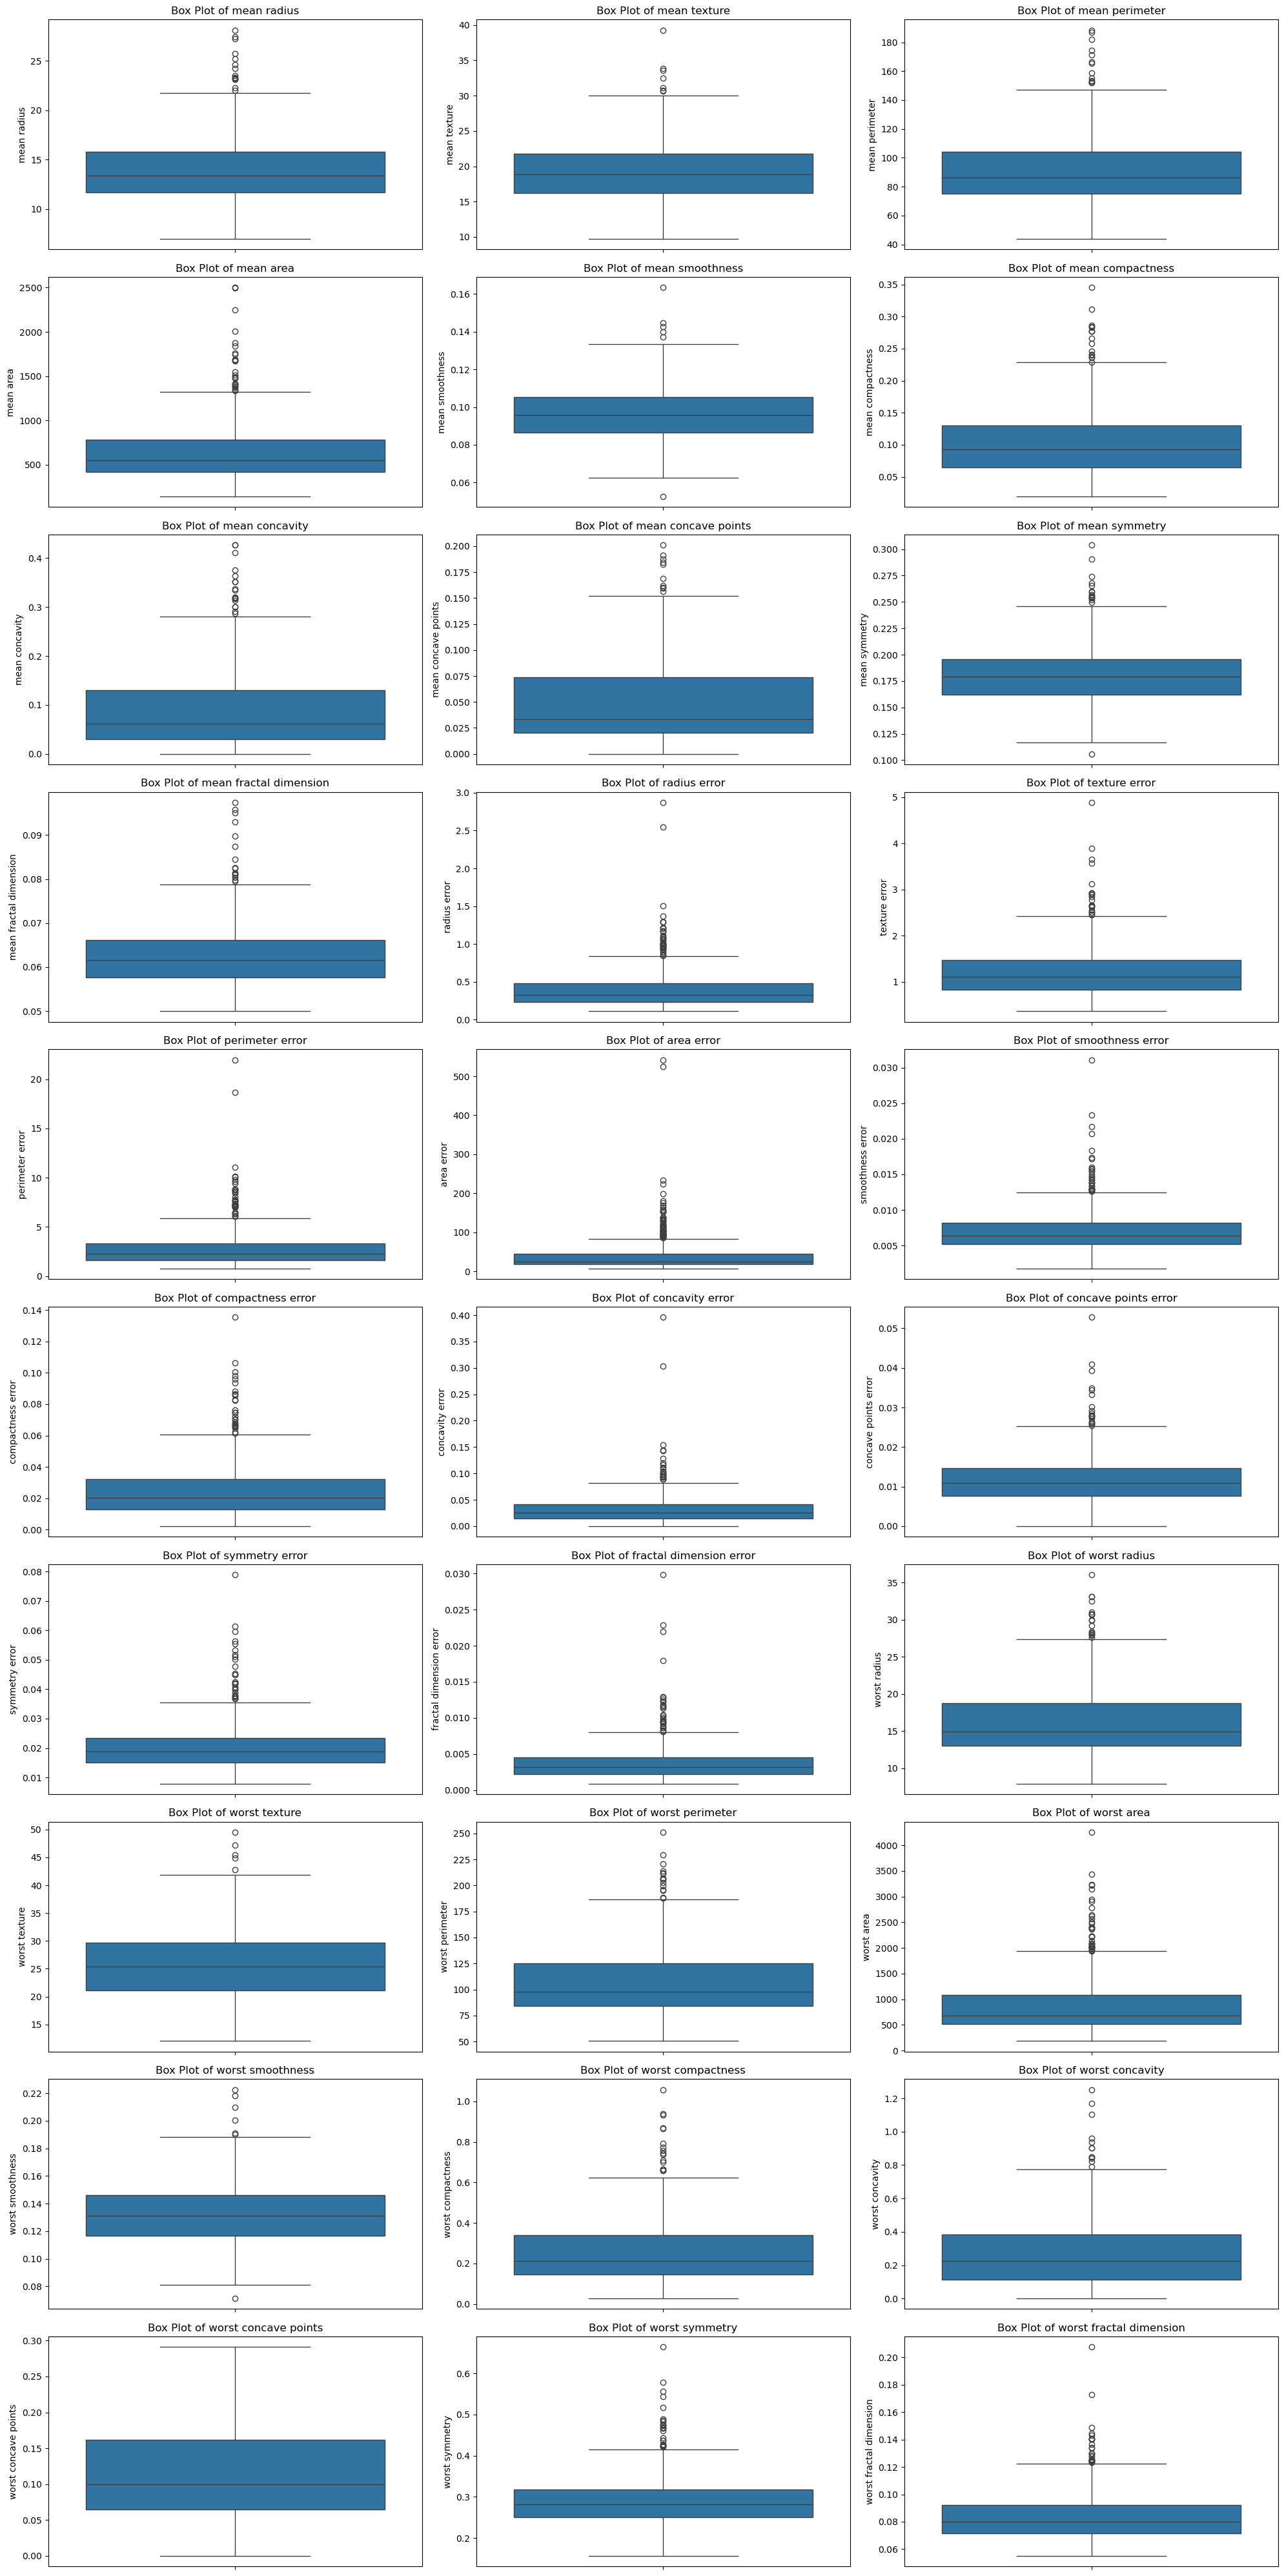

In [37]:
# Boxplot for outliner
plt.figure(figsize=(20, 40))
for i, column in enumerate(x.columns, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(data=x, y=column)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

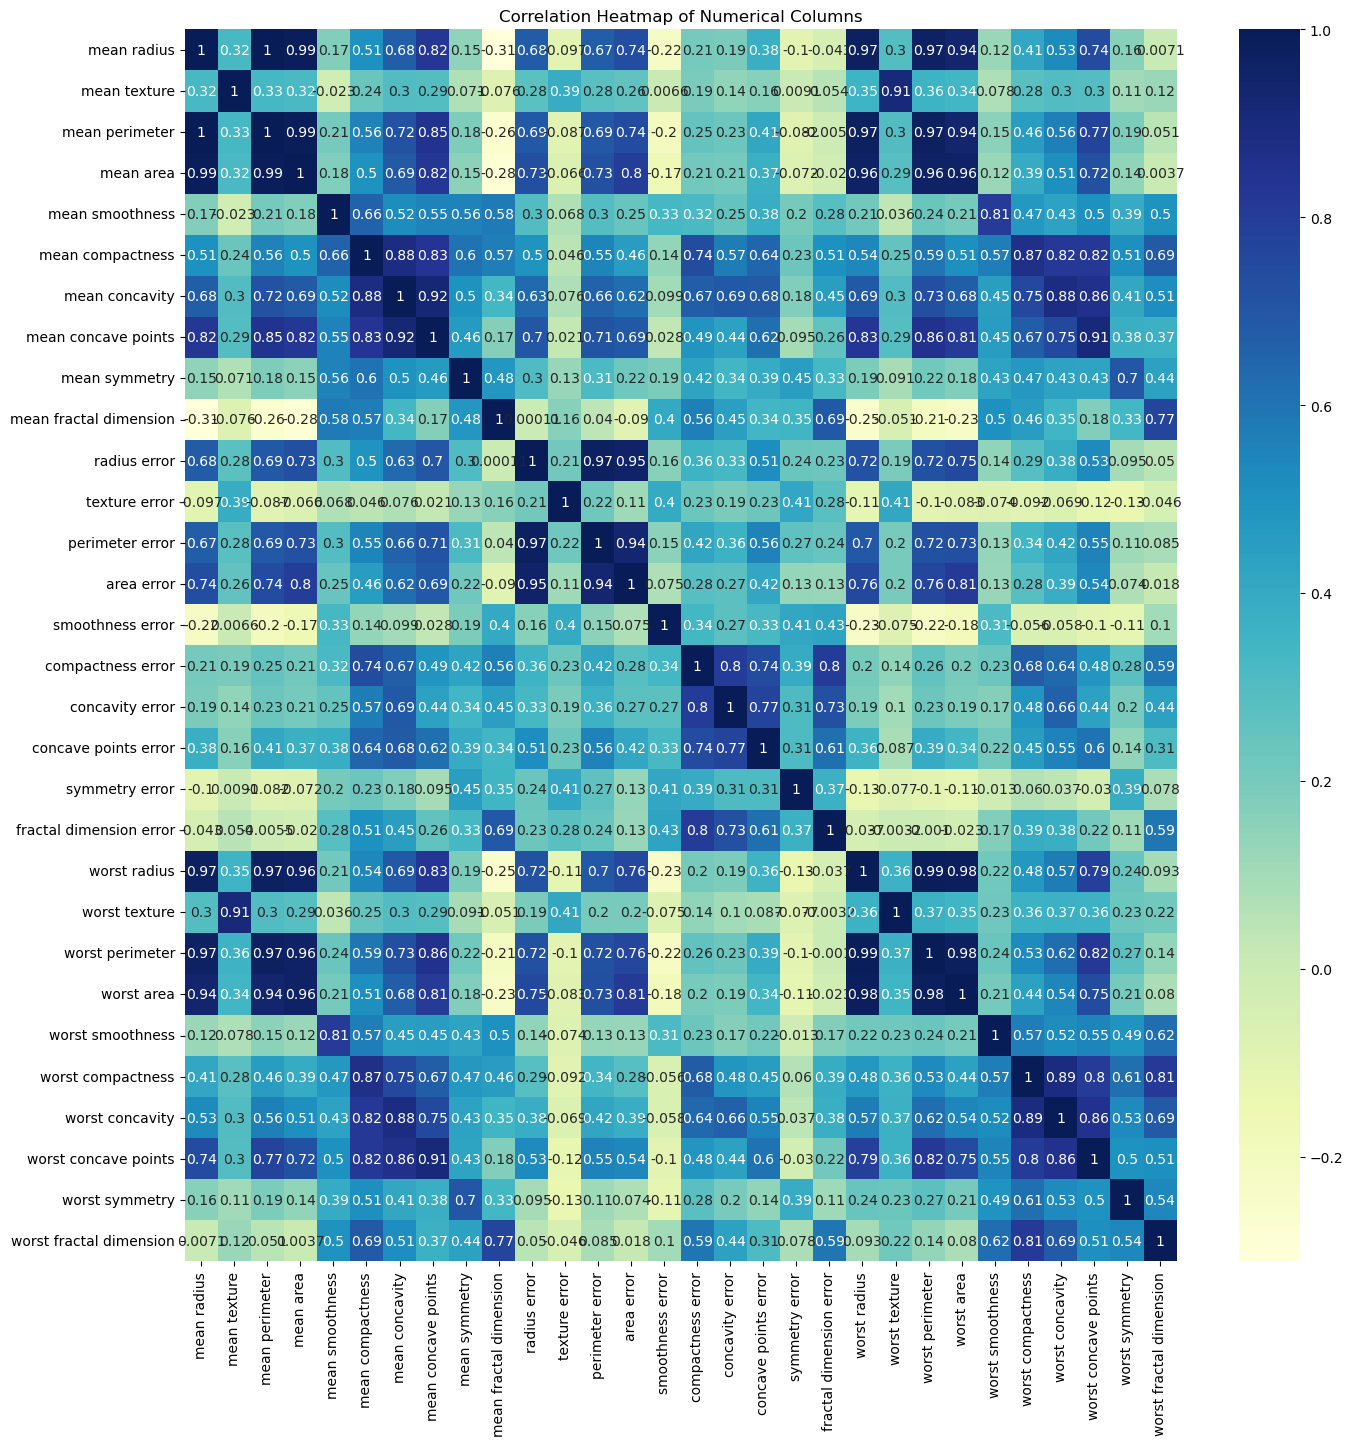

In [53]:
#5 Heatmap
plt.figure(figsize=(16, 16))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [57]:
#6 IQR
def outliers(df):
    outliers_dict = {}
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    return pd.Series(outliers_dict)
outliers_count = outliers(x)
print("\nNumber of outliers in each feature:")
print(outliers_count)


Number of outliers in each feature:
mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


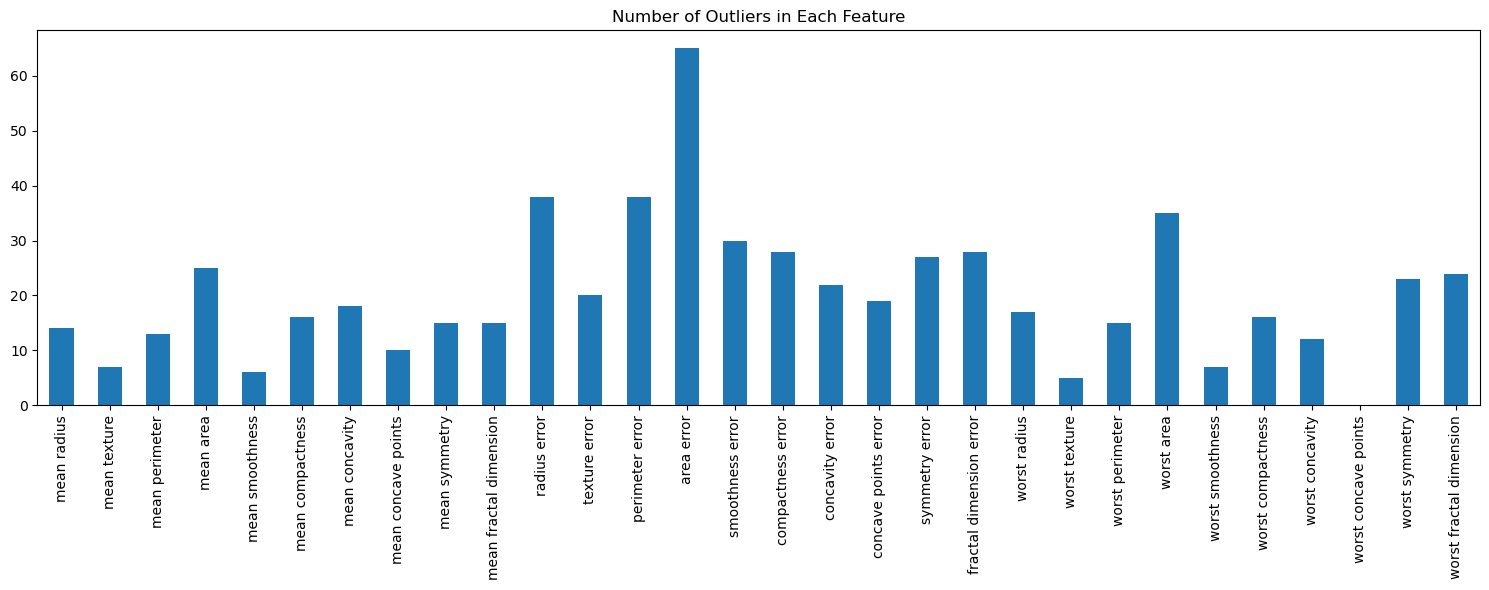

In [59]:
# Plot of outliners
plt.figure(figsize=(15, 6))
outliers_count.plot(kind='bar')
plt.title('Number of Outliers in Each Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [81]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_names = data.feature_names

In [95]:
# Feature Selection using SelectKBest
def perform_feature_selection(x_train, x_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    x_train_selected = selector.fit_transform(x_train, y_train)
    
    # Transform the test data
    x_test_selected = selector.transform(x_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return x_train_selected, x_test_selected, selected_features, feature_scores

In [97]:
# Perform feature selection
k_features = 10
x_train_selected, x_test_selected, selected_features, feature_scores = perform_feature_selection(
    x_train_scaled, x_test_scaled, y_train, k=k_features
)

In [99]:
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. mean radius: 482.23
2. mean perimeter: 522.49
3. mean area: 423.65
4. mean concavity: 396.66
5. mean concave points: 695.18
6. worst radius: 645.35
7. worst perimeter: 681.26
8. worst area: 495.79
9. worst concavity: 331.33
10. worst concave points: 746.49


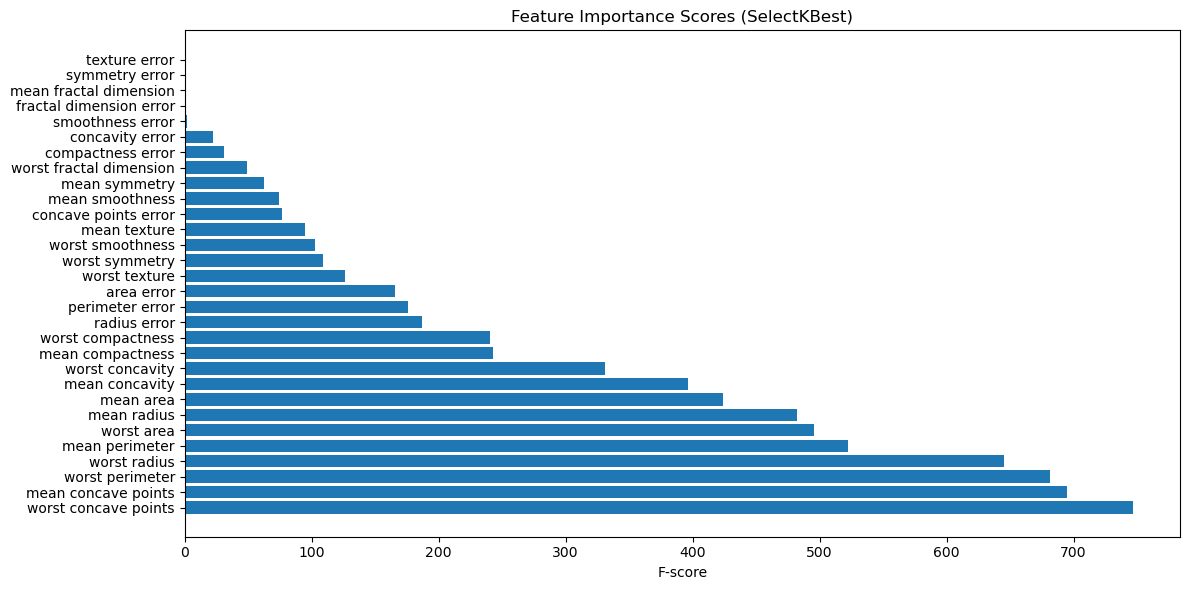

In [101]:
# Plot feature scores
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_scores)), feature_scores['Score'])
plt.yticks(range(len(feature_scores)), feature_scores['Feature'], rotation=0)
plt.xlabel('F-score')
plt.title('Feature Importance Scores (SelectKBest)')
plt.tight_layout()
plt.show()

In [103]:
model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)

C:\Users\arunv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
ypred_LR=model_LR.predict(x_test)

In [107]:
accuracy_LR=accuracy_score(y_test,ypred_LR)
accuracy_LR

0.956140350877193

In [109]:
print("\nClassification Report:")
print(classification_report(y_test, ypred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



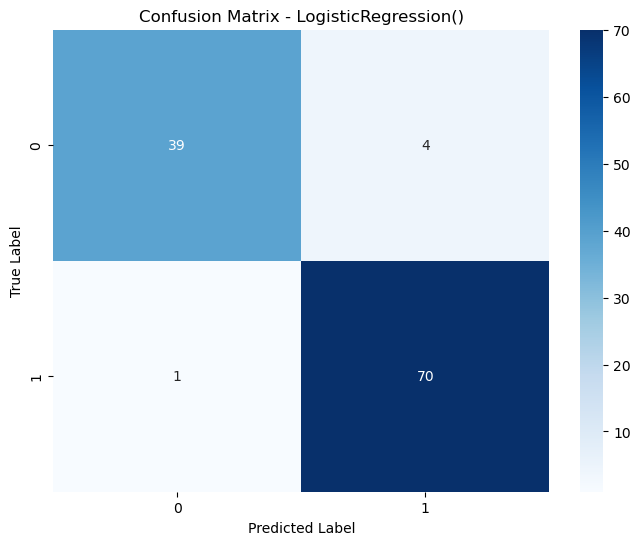

In [113]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()